In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/'3 курс'/'ВвИАД - введение в интеллектуальный анализ данных'/'лабораторная работа'/data

/content/drive/MyDrive/3 курс/ВвИАД - введение в интеллектуальный анализ данных/лабораторная работа/data


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
def check_nan(df):# сколько где nan в процентах
    result = df.isnull().sum() * 100/ len(df)
    result = result[result > 0].sort_values()
    return result

In [8]:
df = pd.read_csv('train.csv') # читаем данные
df
list_nan = df.columns[df.isna().any()].tolist() # Проверим сколько процентов в колонках составляют значения NaN
list_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
df = df.drop(list_nan, axis=1) #axis ось колонок
df # удалили колонки, где NaN больше 17 процентов
check_nan(df) # Проверим сколько процентов в колонках составляют значения NaN

Series([], dtype: float64)

In [10]:
df.info() # проверяем какие типы данных остались
df['MSZoning'].unique() # Пришли к выводу, что много категориальных признаков
check_nan(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Series([], dtype: float64)

In [11]:
x = df.drop('SalePrice', axis=1) # создаем новый дата фрейм
y = df['SalePrice']

<ipython-input-12-3fceb8f3cf4e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr()) # построили хитmap (матрицу корреляции)


<Axes: >

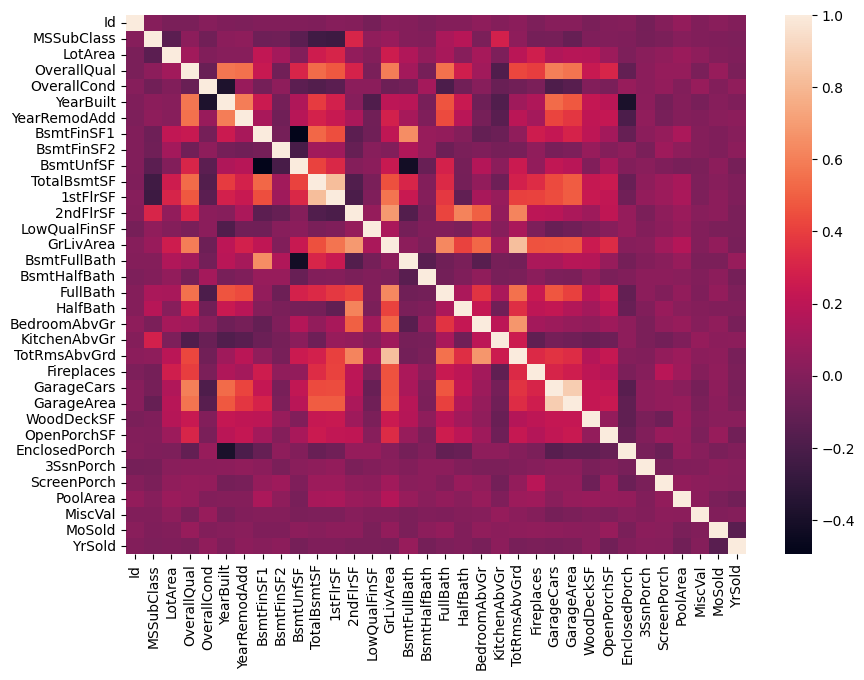

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(x.corr()) # построили хитmap (матрицу корреляции)

In [13]:
# выяснили размер гаража зависит от количество машин сильно
# выяснили площадь подвала зависит от площади 1 этажа сильно
x = df.drop(['TotalBsmtSF', 'GarageCars', 'SalePrice', 'Id', 'Condition2', 'SaleType', 'SaleCondition', 'MoSold'], axis=1)
y = df['SalePrice']

In [14]:
categorial_columns = x.columns.tolist() # признаки
print(len(categorial_columns))


54


In [17]:
for i in categorial_columns:
  print(i)
  print(df[i].unique().tolist())

MSSubClass
[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
MSZoning
['RL', 'RM', 'C (all)', 'FV', 'RH']
LotArea
[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 50271, 7134, 10175, 2645, 11645, 13682, 13072, 6442, 10300, 9375, 9591, 19900, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 13360, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 10800, 6000, 11751, 9525, 7750, 9965, 21000, 7259, 3230, 11616, 8536, 12376, 8461, 21453, 6060, 9464, 7892, 17043, 6780, 4928, 4388, 7590, 8973, 14200, 12224, 7388, 6853, 10335, 10400, 10355, 11070, 9066, 15426, 10500, 8520, 91

In [21]:
#кодируем категориальные признаки
categorial_features = x.select_dtypes(include = "object").columns.tolist() # вывели категориальные признаки
categorial_features

[]

In [23]:
x = pd.get_dummies(x, columns=categorial_features)
x


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,0,1,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,0,1,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,0,0,1,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,961,...,0,0,0,0,0,0,1,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,0,0,1,0,0,1
1456,20,13175,6,6,1978,1988,790,163,589,2073,...,0,0,1,0,0,0,0,0,0,1
1457,70,9042,7,9,1941,2006,275,0,877,1188,...,0,0,0,0,0,0,1,0,0,1
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,0,0,1,0,0,1


In [24]:
categorial_columns = x.columns.tolist() # признаки
categorial_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_Brk

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
model = LinearRegression() #инициализировали модель, базово есть fit и predict

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [28]:
model.fit(X_train, y_train) # обучились

LinearRegression()

In [29]:
pred = model.predict(X_test)
X_test.iloc[[0]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
335,190,164660,5,6,1965,1965,1249,147,103,1619,...,0,0,0,0,0,0,1,0,0,1


In [30]:
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, pred, squared=False)

25989.349227217925

In [205]:
print(mean_squared_error(y_test, pred, squared=False)/np.mean(y_test))

0.1431336096459765


In [167]:
from mlxtend.evaluate import bias_variance_decomp # lse
print("{0} средние ожидаемые потери \n {1} среднее отколонение \n {2} средняя дисперсия".format(*bias_variance_decomp(model, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=50)))

863962447.4204369 средние ожидаемые потери 
 623762544.8089647 среднее отколонение 
 240199902.61147207 средняя дисперсия


In [49]:
  import pickle

In [51]:
with open("LinearRegression.pickle", "wb") as file:
    pickle.dump(model, file)

In [52]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b